In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
#pd.read_csv()? # get info

In [53]:
df = pd.read_csv("btc-market-price.csv", header=None) # it does not have column names
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [54]:
df.columns = ['TimeStamp', 'Price'] # name the columns
df.head()

,TimeStamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [55]:
df.tail() # last rows

,TimeStamp,Price
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


In [56]:
df.dtypes # check data types

TimeStamp     object
Price        float64
dtype: object

In [57]:
df.shape

(365, 2)

In [58]:
df.info

<bound method DataFrame.info of                TimeStamp        Price
0    2017-04-02 00:00:00  1099.169125
1    2017-04-03 00:00:00  1141.813000
2    2017-04-04 00:00:00  1141.600363
3    2017-04-05 00:00:00  1133.079314
4    2017-04-06 00:00:00  1196.307937
..                   ...          ...
360  2018-03-28 00:00:00  7960.380000
361  2018-03-29 00:00:00  7172.280000
362  2018-03-30 00:00:00  6882.531667
363  2018-03-31 00:00:00  6935.480000
364  2018-04-01 00:00:00  6794.105000

[365 rows x 2 columns]>

In [59]:
df.describe() # timestamp was not parsed correct

,Price
count,365.000000
mean,6359.574241
std,4528.878870
min,1099.169125
25%,2585.349186
50%,4594.987850
75%,9182.843333
max,19498.683333


In [60]:
df['TimeStamp'] = pd.to_datetime(df['TimeStamp']) # make the data a number
df.head()

,TimeStamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [61]:
df.set_index('TimeStamp', inplace=True) # index as timestamp helps keep order
df.loc['2017-04-06']

Price    1196.307937
Name: 2017-04-06 00:00:00, dtype: float64

In [62]:
# putting it all together
dff = pd.read_csv(
    filepath_or_buffer= "btc-market-price.csv",       # the source of data
    header=None,                                      # don't inffer header from first row
    names= ['TimeStamp', "Price"],                    # column names
    index_col=0,                                      # use first column as index
    parse_dates=True                                  # parse the date while reading
)
dff.head()

,Price
TimeStamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


<AxesSubplot: xlabel='TimeStamp'>

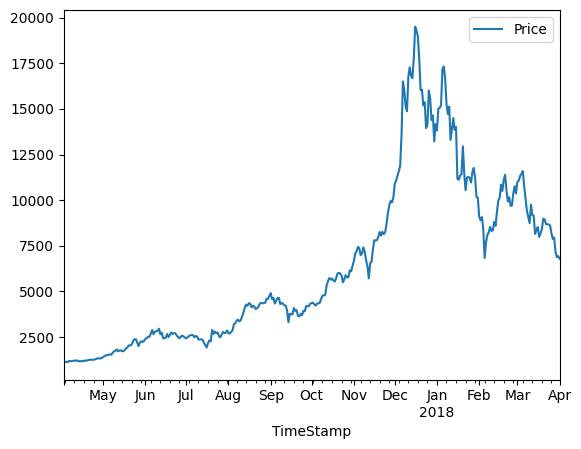

In [63]:
dff.plot() # quick plot

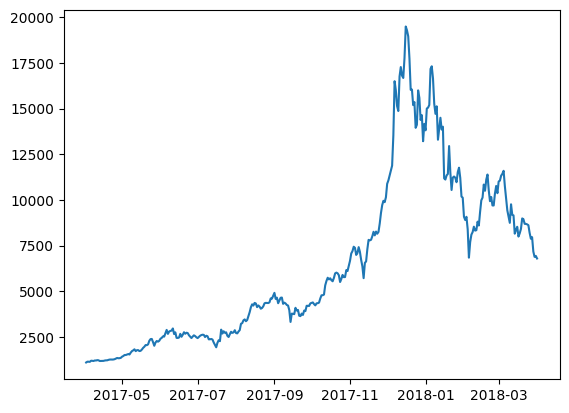

In [64]:
plt.plot(dff.index, df['Price']) # use matplotlib, by index

# putting it together

In [65]:
# read the BTC
btc = pd.read_csv(
    filepath_or_buffer= "btc-market-price.csv",       # the source of data
    header=None,                                      # don't inffer header from first row
    names= ['TimeStamp', "Price"],                    # column names
    index_col=0,                                      # use first column as index
    parse_dates=True                                  # parse the date while reading
)
btc.head()

,Price
TimeStamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [67]:
# read the ETH
eth = pd.read_csv(
    filepath_or_buffer= "eth-price.csv",
    parse_dates=True,
    index_col=0
)
eth.head()

,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


In [68]:
# combine the data
coins = pd.DataFrame(index=eth.index) # same index, both files
coins.head()

""
Date(UTC)
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


In [69]:
# get the price columns
coins['BTC'] = btc['Price']
coins['ETH'] = eth['Value']
coins.head()

,BTC,ETH
Date(UTC),,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<AxesSubplot: xlabel='Date(UTC)'>

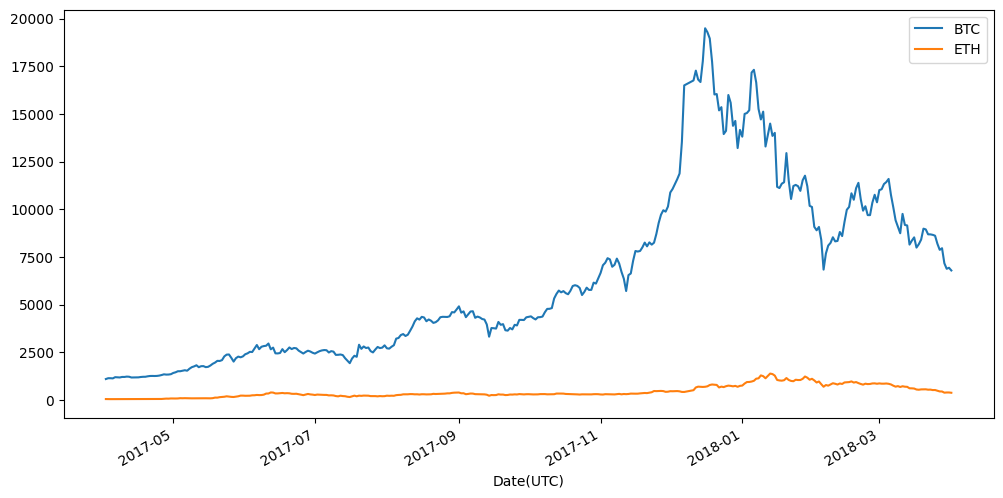

In [70]:
coins.plot(figsize=(12,6))

<AxesSubplot: xlabel='Date(UTC)'>

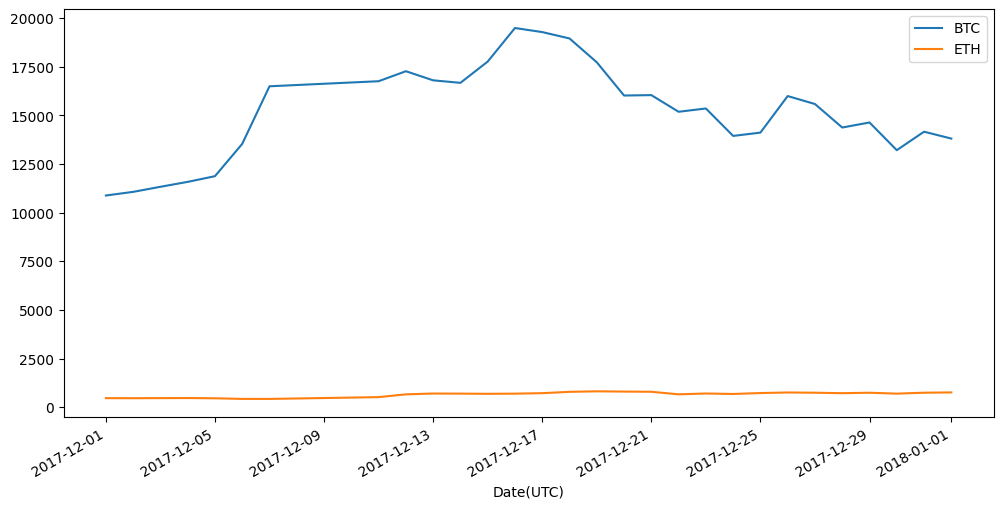

In [71]:
# see the missing data
coins.loc['2017-12-01' : '2018-01-01'].plot(figsize=(12,6))